In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [2]:
#Step 1:Load Data
california=fetch_california_housing()
df=pd.DataFrame(california.data,columns=california.feature_names)
df['Price']=california.target
print("Dataset (first 5 rows):\n",df.head())

Dataset (first 5 rows):
    MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Price  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  


In [3]:
x=df.drop('Price',axis=1)
y=df['Price']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

#Linear Regression
model=LinearRegression()
model.fit(x_train,y_train)
print(f'Linear Equation: Price={model.coef_[0]:.2f} * MedInc + {model.intercept_:.2f}')

y_pred=model.predict(x_test)
mse=mean_squared_error(y_test,y_pred)
print(f"MSE :{mse:.2f}")
mae=mean_absolute_error(y_test,y_pred)
print(f"MAE :{mae:.2f}")
rmse=np.sqrt(mse)
print(f"RMSE :{rmse:.2f}")
r2=r2_score(y_test,y_pred)
print(f"R2 Score  :{r2:.2f}")

Linear Equation: Price=0.45 * MedInc + -37.02
MSE :0.56
MAE :0.53
RMSE :0.75
R2 Score  :0.58


# Calculate Residual

In [5]:
residuals=y_test-y_pred
print("\nFirst 5 Residuals:")
print(pd.DataFrame({'Actual':y_test[:5],'Predicted':y_pred[:5],'Residual':residuals[:5]}))


First 5 Residuals:
        Actual  Predicted  Residual
20046  0.47700   0.719123 -0.242123
3024   0.45800   1.764017 -1.306017
15663  5.00001   2.709659  2.290351
20484  2.18600   2.838926 -0.652926
9814   2.78000   2.604657  0.175343


# * Positive Residual : Model underpredicted(e.g.,0.560=$56k too low)
  
# * Negative Residual : Model overpredicted(too high) **

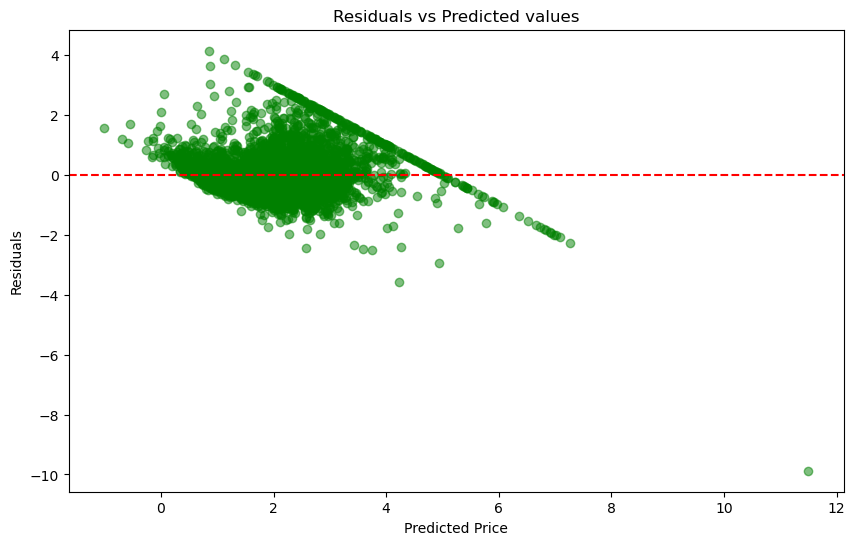

In [11]:
plt.figure(figsize=(10,6))
plt.scatter(y_pred,residuals,color='green',alpha=0.5)
plt.axhline(y=0,color='red',linestyle='--')
plt.ylabel("Residuals")
plt.xlabel("Predicted Price")
plt.title("Residuals vs Predicted values")
plt.show()

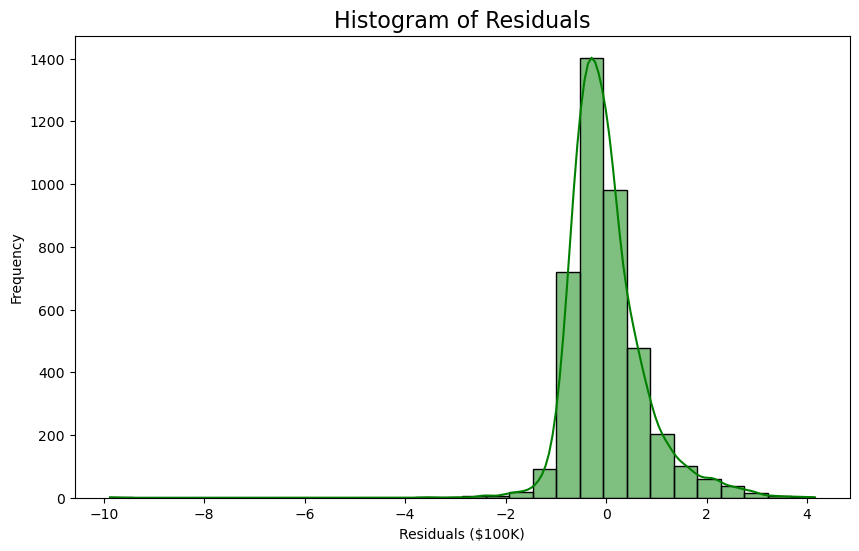

In [14]:
plt.figure(figsize=(10,6))
sns.histplot(residuals,bins=30,kde=True,color='green')
plt.xlabel("Residuals ($100K)")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals",fontsize=16)
plt.show()

# Q-Q Plot(Normality Check)

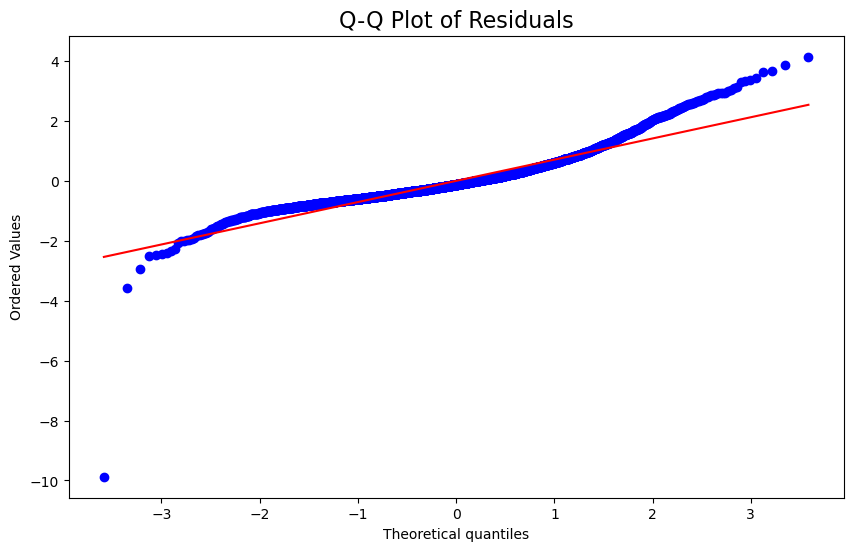

In [19]:
import scipy.stats as stats
plt.figure(figsize=(10,6))
stats.probplot(residuals,dist='norm',plot=plt)
plt.title('Q-Q Plot of Residuals',fontsize=16)
plt.show()

# Cross Validation

Cross Valdation is a technique used to evaluate the performance of a ML model by splitting the dataset into multiple subsets for training and testing.This helps in avoiding overfitting and ensures that the model generalizes well to unseen data. 

K-Fold Cross-Validation

1.Split the dataset into K equal-sized folds

2.Train the model on K-1 folds and test on the remaining fold

3.Repeat the process K times each timeuse a diffrenet fold as test set

4.computes average performnace across all K iterations


In [24]:
from sklearn.model_selection import KFold,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

X,y=make_regression(n_samples=100,n_features=2,noise=20)

kf=KFold(n_splits=5,shuffle=True,random_state=42)
model=LinearRegression()

scores=cross_val_score(model,X,y,cv=kf,scoring='r2')
print("Cross-validation scores",scores)
print("Avg Scores",scores.mean())

Cross-validation scores [0.8130843  0.97184343 0.93613548 0.95460916 0.9019255 ]
Avg Scores 0.9155195757668825


In [31]:
x1=df.drop('Price',axis=1)
y1=df['Price']

kf=KFold(n_splits=5,shuffle=True,random_state=42)
model=LinearRegression()

scores=cross_val_score(model,x1,y1,cv=kf,scoring='r2')
print("Cross-validation scores",scores)
print("Avg Scores",scores.mean())

Cross-validation scores [0.57578771 0.61374822 0.60856043 0.62126494 0.5875292 ]
Avg Scores 0.6013781013684618
